In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

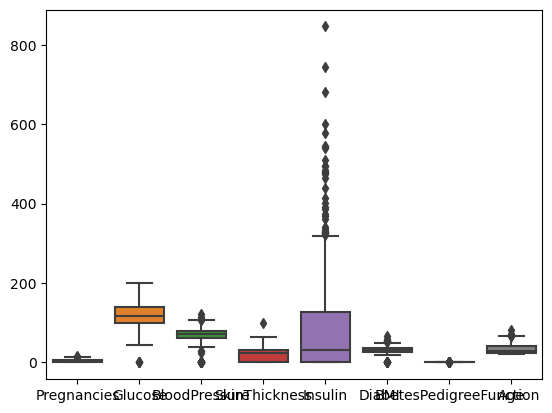

In [53]:
sns.boxplot(data=df.iloc[:, :-1])

<AxesSubplot:>

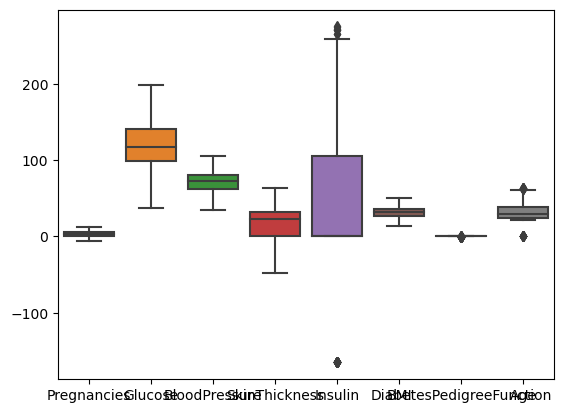

In [72]:
for i in range(df.shape[1]-1):
    upper = df.iloc[:, i].quantile(0.75)
    lower = df.iloc[:, i].quantile(0.25)
    IQR = upper - lower
    upper = upper + 1.5*IQR
    lower = lower - 1.5*IQR

    for j in range(df.shape[0]):
        if df.iloc[j, i] > upper: df.iloc[j, i] = lower
        elif df.iloc[j, i] < lower: df.iloc[j, i] = lower
        
sns.boxplot(data=df.iloc[:, :-1])

<AxesSubplot:>

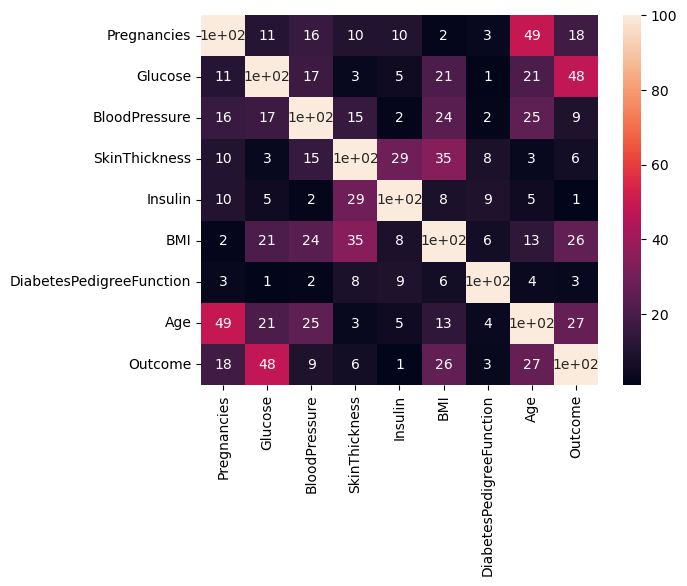

In [73]:
sns.heatmap(df.corr().abs().round(2)*100, annot=True)

In [153]:
df2 = df.drop(["SkinThickness"], axis=1)

In [154]:
xtrain, xtest, ytrain, ytest = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], train_size=0.75)

xtrain, xtest = sm.add_constant(xtrain), sm.add_constant(xtest)
log_reg_fitted = sm.Logit(ytrain, xtrain).fit()

print(log_reg_fitted.summary())

Optimization terminated successfully.
         Current function value: 0.469652
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                  0.2635
Time:                        14:49:14   Log-Likelihood:                -270.52
converged:                       True   LL-Null:                       -367.32
Covariance Type:            nonrobust   LLR p-value:                 2.593e-38
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.5600      0.877     -9.756      0.000     -10.280

In [155]:
ypred = log_reg_fitted.predict(xtest).round()

In [156]:
confusion_matrix(ytest, ypred)

array([[109,   8],
       [ 40,  35]], dtype=int64)

In [157]:
accuracy_score(ytest, ypred)

0.75

In [158]:
precision_score(ytest, ypred)

0.813953488372093

In [159]:
recall_score(ytest, ypred)

0.4666666666666667

In [160]:
f1_score(ytest, ypred)

0.5932203389830508